### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 10</span>

## <span style="color:blue"> Esercizio 10.1</span>
### Scopo
Lo scopo dell'esercizio è di risolvere il problema affrontato nell'esercitazione precedente del commesso viaggiatore, adattando il codice dell'algoritmo genetico, da noi implementato, all'algoritmo di Simulated Anealling (SA). 

### Compilazione
Il codice è nella cartella <font face = "Courier"> ex10.1 </font>. E' possibile compilarlo tramite il comando <font face = "Courier"> `$make` </font> o se si vogliono utilizzare le librerie armadillo digitando <font face = "Courier"> `$make -larmadillo` </font>, per eseguirlo usiamo il comando <font face = "Courier"> `$./main.exe` </font>. 
Il codice legge le città in input dal file 'cities.0' (se il file non c'è le città vengono prodotte casualmente) dopodichè vengono generati due files in output: uno che contiene i cammini più brevi in funzione della generazione e l'altro in cui viene salvato il cammino migliore dell'ultima generazione.


### Cerchio
#### Città generate lungo una circonferenza
Partiamo da un valore iniziale della temperatura di $T=1 K$ e scendiamo fino a $T=0,001 K$ tramite decrementi di 0,001 K step.
Per ogni step abbiamo spostato il sistema 15.000 volte utilizzando l'algoritmo Metropolis.
Abbiamo provato diverse soluzioni: 
    
    1- Partendo da T=10.25 K fino a T=0,01 K a step di 0,01 K  
    2- Da T=1.025 K a T=0,001 K a step di 0,001 K

La soluzione 1) è quella più semplice da implementare e la migliore in termini di efficienza , perché se $T = 10.25 K$ il tasso di accettazione è 0,9 quindi il sistema è libero di muoversi come se la temperatura fosse più alta.

La situazione iniziale da cui partiamo è quella in cui le città sono disposte lungo una circoferenza (come per l'esercitazione numerica precedente dell'algoritmo genetico). E' facile quindi verificare se il nuovo algoritmo implementato funziona. 

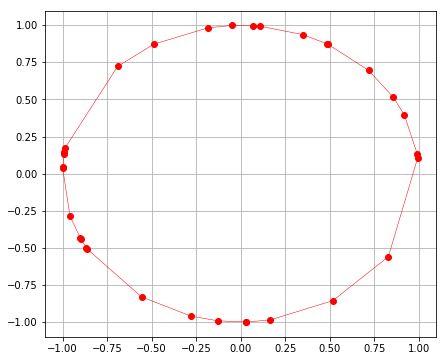

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex10.1/cities_cerchio.final", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro',linestyle='-', lw=0.5)
plt.grid(True)
plt.show()

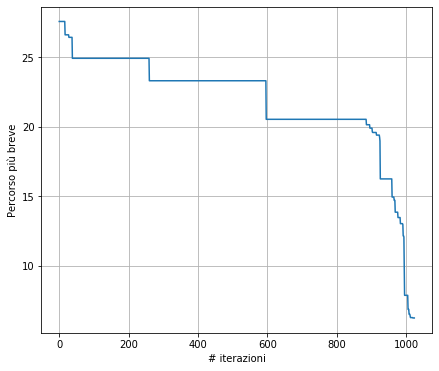

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex10.1/SmallestPath_cerchio.dat", usecols=(0, 1), delimiter=' ', unpack='true')
plt.plot(x, y)
plt.xlabel('# iterazioni')
plt.ylabel('Percorso più breve')
plt.grid(True)
plt.show()

Sembra che qualcosa non funzioni nell'algoritmo.

### Quadrato
#### Città generate all'interno di un quadrato
Consideriamo il caso in cui le città siano disposte all'interno di un quadrato e le confrontiamo con la medesima configurazione di città generate nell'esercitazione precedente dell'algoritmo genetico.

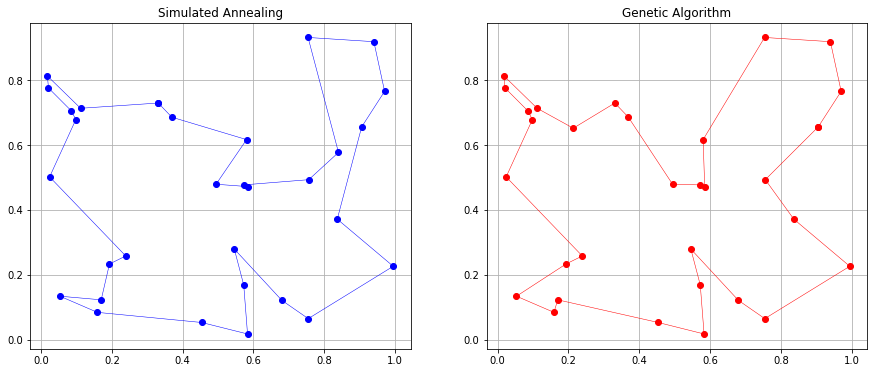

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 8]
x_SA, y_SA = np.loadtxt("ex10.1/cities_quadrato.final", usecols=(0,1), delimiter=' ', unpack='true')
x_GA, y_GA = np.loadtxt("../ex9/ex09.1/cities_quadrato.final", usecols=(0,1), delimiter=' ', unpack='true')

ax[0].plot(x_SA,y_SA, 'ro',linestyle='-', lw=0.5,color='blue')
ax[0].set_title('Simulated Annealing')
ax[0].grid(True)
ax[1].plot(x_GA,y_GA, 'ro',linestyle='-', lw=0.5,color='red')
ax[1].set_title('Genetic Algorithm')
ax[1].grid(True)
plt.show()

Le due rappresentazioni grafiche sopra che rappresentano rispettivamente la SA e il GA sono differenti, occore capire ora quale delle due ha disegnato il percorso migliore.
I risultati trovati sono i seguenti:
    
    -1. Simulated annealing ---> 4.95489
    -2. Algoritmo genetico ---> 4.68713
    
L'algoritmo GA ha trovato un percorso migliore. Ciò significa che l'AG che abbiamo creato non ha bisogno di essere migliorato, aumentando il numero di generazioni o implementando nuove mutazioni o crossover.
Ciò risulta strano perchè mi sarei aspettata un miglioramento del percorso tramite l'SA.

Vediamo ora come modificare il grafico della lunghezza del percorso migliore:


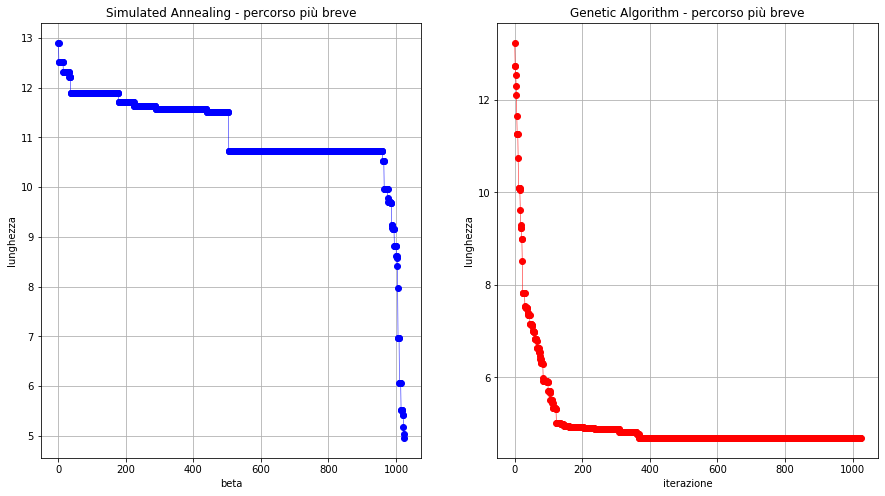

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 8]

x_SA, y_SA = np.loadtxt("ex10.1/SmallestPath_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
x_GA, y_GA = np.loadtxt("../ex9/ex09.1/SmallestPath_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax[0].plot(x_SA,y_SA, 'ro',linestyle='-', lw=0.5, color='blue')
ax[0].set_title('Simulated Annealing - percorso più breve')
ax[0].set_xlabel('beta')
ax[0].set_ylabel('lunghezza')
ax[0].grid(True)

ax[1].plot(x_GA,y_GA, 'ro',linestyle='-', lw=0.5, color='red')
ax[1].set_title('Genetic Algorithm - percorso più breve')
ax[1].set_xlabel('iterazione')
ax[1].set_ylabel('lunghezza')
ax[1].grid(True)

plt.show()

Vediamo che la SA inizia a trovare buoni percorsi solo dopo molte mosse (per ogni valore di beta abbiamo fatto 15000 mosse), mentre l'algoritmo genetico dopo 200-300 iterazioni propone un percorso che non differisce troppo da quello migliore.

I due algoritmi richiedono più o meno lo stesso **tempo di esecuzione**. L'algoritmo genetico GA lavora con una popolazione che cresce come $n^2$ mentre l'SA lavora con un solo percorso che si muove all'interno dello spazio di tutti i percorsi possibili quindi in teoria aumentando il numero delle città l'SA diventerebbe l'algoritmo migliore per il nostro obiettivo (ossia trovare il percorso più breve).

## <span style="color:blue"> Esercizio 10.2</span>


Dobbiamo parallelizzare il codice dell'algoritmo genetico utilizzando le librerie MPICH in modo che produca 4 ricerche parallele con l'algoritmo genetico GA.
Ogni nodo dovrebbe eseguire una ricerca GA indipendente, quindi verranno prodotti 4 GA, se la ricerca è andata a buon fine dovremmo avere il seguente output a schermo:
    
    - il nodo 0 ha prodotto il risultato 1
    - il nodo 1 ha prodotto il risultato 2
    - il nodo 2 ha prodotto il risultato 3
    - il nodo 3 ha prodotto il risultato 4

Quando parte la migrazione, dopo un certo numero di generazioni, questi 4-core (Continenti) si scambiano in modo casuale il loro miglior individuo. 
### Compilazione
Il codice è salvato nella cartella <font face = "Courier"> ex10.2 </font>. E' possibile compilarlo usufruendo delle librerie per il calcolo parallelo installate sul proprio pc o collegandosi ai terminali di calcolo <font face = "Courier"> `$mpicxx main.cpp random.cpp percorso.cpp city.cpp` </font> ed eseguirlo con il comando <font face = "Courier"> `$mpiexec -np 4 ./a.out` </font>. 
Il codice implementato legge le città dal file 'cities.0' (se il file non esiste vengono generate n città casualmente) e produce 3 files in output: 
    1) la lunghezza del percorso più breve in funzione di beta (una per ogni thread) e 2) il miglior percorso dell'ultima generazione.

### Cerchio

Traccio la lunghezza del percorso migliore per 32 città disposte lungo un cerchio e un'immagine del percorso migliore rispetto a quella ottenuta dal codice non parallelizzato.
Il mio eeepc 900 ha solo 2 core quindi non mi aspetto un significativo miglioramento del calcolo del percorso migliore.
Questi sono i miei risultati:

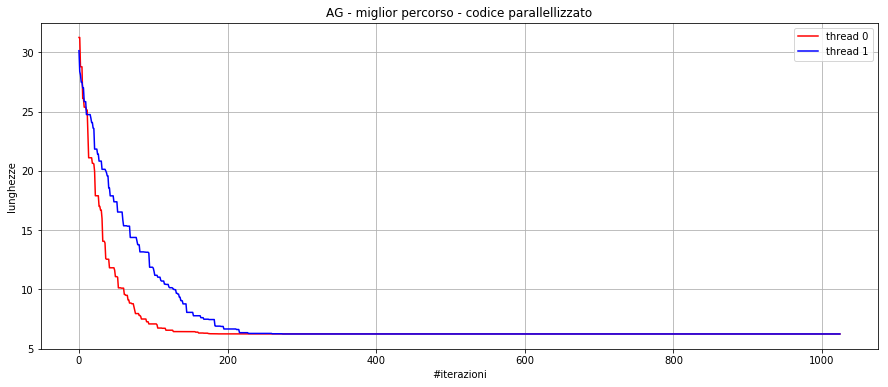

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 6]

x_0, y_0 = np.loadtxt("ex10.2/Risultati/SmallestPath.thread0_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
x_1, y_1 = np.loadtxt("ex10.2/Risultati/SmallestPath.thread1_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x_0, y_0, linestyle='-', color='red', label='thread 0')
plt.plot(x_1, y_1, linestyle='-', color='blue', label='thread 1')
plt.title('AG - miglior percorso - codice parallellizzato')
plt.xlabel('#iterazioni')
plt.ylabel('lunghezze')
plt.legend()
plt.grid(True)
plt.show()

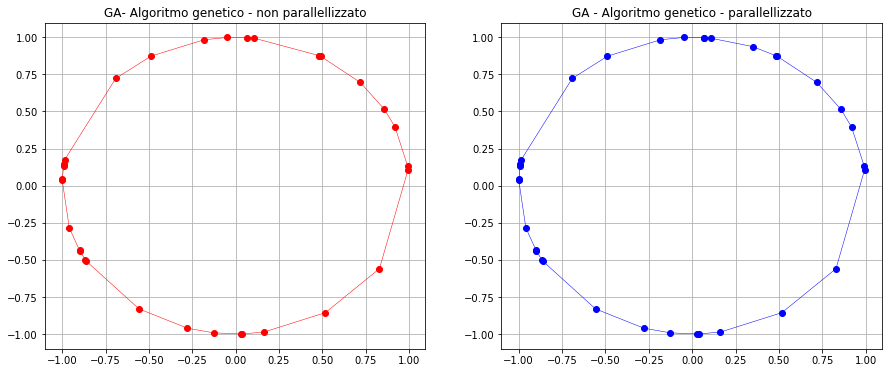

In [11]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 6]

x_GA, y_GA = np.loadtxt("../ex9/ex09.1/cities_cerchio.final", usecols=(0,1), delimiter=' ', unpack='true')
x_par, y_par = np.loadtxt("ex10.2/cities_cerchio.final", usecols=(0,1), delimiter=' ', unpack='true')
ax[0].plot(x_GA,y_GA, 'ro',linestyle='-', lw=0.5, color='red')
ax[0].set_title('GA- Algoritmo genetico - non parallellizzato')
ax[0].grid(True)
ax[1].plot(x_par,y_par, 'ro',linestyle='-', lw=0.5, color='blue')
ax[1].set_title('GA - Algoritmo genetico - parallellizzato')
ax[1].grid(True)
plt.show()

Dai grafici sovrastanti si osserva che abbiamo trovato dei risultati molto simili prima e dopo la parallelizzazione dell'algoritmo genetico. Ciò significa che l'algoritmo genetico che abbiamo implementato nell'esercitazione precedente riusciva già a calcolare il percorso più breve.

- AG non parallelizzato $\to 6.2403$
- AG parallelizzato $\to 6.2403$

I due thread che abbiamo sfruttato hanno svolto calcoli diversi prima di arrivare allo stesso risultato nel calcolo del percorso migliore, ciò significa che la parallellizzazione dell'algoritmo genetico è stata implementata correttamente.
Sarebbe interessante eseguire il codice sfruttando più core (almeno 4 core), e visualizzare ciò che succede. Ho provato a collegarmi in remoto sui pc del laboratorio di calcolo di fisica e ad eseguire il codice su 4 nodi ma purtroppo il calcolo effettuato impiega molto tempo prima di produrre un output, così ho preferito utilizzare solo i due core del mio eeepc-900 Asus.

### Quadrato

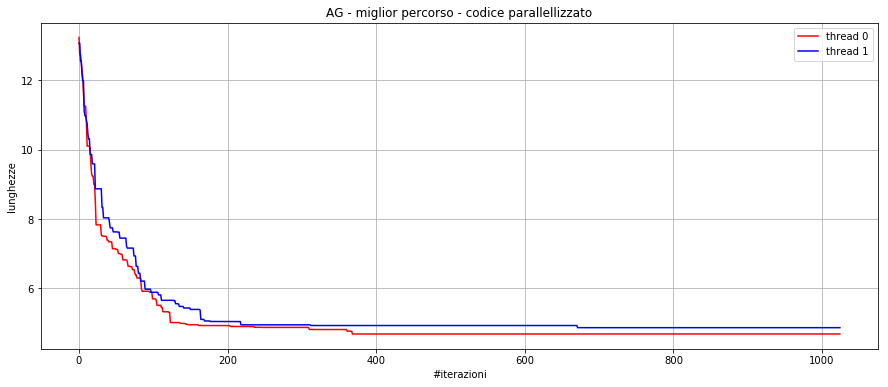

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 6]

x_0, y_0 = np.loadtxt("ex10.2/Risultati/SmallestPath.thread0_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
x_1, y_1 = np.loadtxt("ex10.2/Risultati/SmallestPath.thread1_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x_0, y_0, linestyle='-', color='red', label='thread 0')
plt.plot(x_1, y_1, linestyle='-', color='blue', label='thread 1')
plt.title('AG - miglior percorso - codice parallellizzato')
plt.xlabel('#iterazioni')
plt.ylabel('lunghezze')
plt.legend()
plt.grid(True)
plt.show()

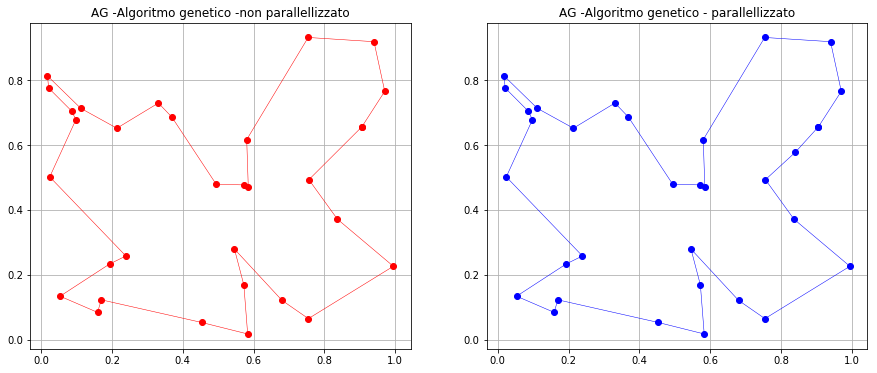

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 6]

x_GA, y_GA = np.loadtxt("../ex9/ex09.1/cities_quadrato.final", usecols=(0,1), delimiter=' ', unpack='true')
x_par, y_par = np.loadtxt("ex10.2/cities_quadrato.final", usecols=(0,1), delimiter=' ', unpack='true')
ax[0].plot(x_GA,y_GA, 'ro',linestyle='-', lw=0.5, color='red')
ax[0].set_title('AG -Algoritmo genetico -non parallellizzato')
ax[0].grid(True)

ax[1].plot(x_par,y_par, 'ro',linestyle='-', lw=0.5, color='blue')
ax[1].set_title('AG -Algoritmo genetico - parallellizzato')
ax[1].grid(True)
plt.show()

Dai grafici sovrastanti si osserva esattamente come per il caso precedente che abbiamo trovato dei risultati molto simili prima e dopo la parallelizzazione dell'algoritmo genetico. Ciò mi sembra abbastanza strano, le lunghezze dei percorsi migliori per i due casi sono:

- AG non parallelizzato $\to 4.6871$
- AG parallelizzato $\to 4.6871$

Siccome i due thread sfruttati nel calcolo hanno prodotto percorsi diversi prima di trovare il percorso migliore significa che l'algoritmo di parallelizzazione è stato implementato correttamente e che L'AG prima della parallelizzazione era già in grado di trovare il percorso più breve.